In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/notebook388161bf19/__results__.html
/kaggle/input/notebook388161bf19/headline_classifier.pt
/kaggle/input/notebook388161bf19/__notebook__.ipynb
/kaggle/input/notebook388161bf19/__output__.json
/kaggle/input/notebook388161bf19/custom.css
/kaggle/input/news-category-dataset/News_Category_Dataset_v2.json


In [2]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [3]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [4]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(None,config='bert-base-uncased',output_attentions = False,num_labels=41,state_dict=torch.load('../input/notebook388161bf19/headline_classifier.pt'))
model.cuda()
model.eval()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [5]:
df = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v2.json', lines = True)
print(format(df.shape[0]))

200853


In [6]:
cat_ids = list(df.category.unique())

In [7]:
df['label'] = df.apply(lambda row: cat_ids.index(row.category), axis = 1)

df.sample(10)

,category,headline,authors,link,short_description,date,label
193060,IMPACT,Volunteerism: A Way of Life and a Career,"Danilo Minnick, Contributor\nVolunteer Service...",https://www.huffingtonpost.com/entry/national-...,The passion of the volunteers and the generous...,2012-04-21,3
31993,LATINO VOICES,Why Laurie Hernandez Owning Her Natural Curly ...,Carolina Moreno,https://www.huffingtonpost.com/entry/heres-why...,The gymnast takes the gold for representation!,2017-03-13,17
179601,STYLE & BEAUTY,Non-Fashion Editor Befuddled And Utterly Unimp...,"Chris C. Anderson, Contributor\nSenior Editor,...",https://www.huffingtonpost.com/entry/fashion-w...,My first high fashion week experience has come...,2012-09-13,34
135381,STYLE & BEAUTY,Sailor Brinkley's Ralph Lauren Modeling Gig Is...,Ellie Krupnick,https://www.huffingtonpost.com/entry/sailor-br...,Want more? Be sure to check out HuffPost Style...,2013-12-26,34
65658,ARTS & CULTURE,A Photographer And His Husband Challenge Weddi...,Maddie Crum,https://www.huffingtonpost.com/entry/till-deat...,Photographer John Paul Evans is celebrating un...,2016-02-25,21
200302,FOOD & DRINK,Ultimate Baked Artichoke And Spinach Dip,"Jennifer Segal, Contributor\nChef, Cookbook Au...",https://www.huffingtonpost.com/entry/artichoke...,"I love artichoke and spinach dip, especially s...",2012-02-03,37
90374,PARENTS,How Wordless Books Can Help Your Kid Learn to ...,"Common Sense Media, ContributorCommonsensemedi...",https://www.huffingtonpost.com/entry/how-wordl...,"Anyone who's ""read"" a picture book can tell yo...",2015-05-22,20
187525,WELLNESS,The Calm Brain: The Neurology of Stress and C...,"Gayatri Devi, MD, MS, Contributor\nClinical Pr...",https://www.huffingtonpost.com/entry/stress-ti...,Tapping into the vagus nerve helps us achieve ...,2012-06-19,31
33844,PARENTS,This NSFW Edit To 'Peppa Pig' Is Hilarious,Caroline Bologna,https://www.huffingtonpost.com/entry/this-nsfw...,LOL.,2017-02-20,20
89590,TRAVEL,Travel Cheat Sheet for Watching the NBA Finals...,"Hipmunk, ContributorThe fastest, easiest way t...",https://www.huffingtonpost.com/entry/travel-ch...,,2015-05-31,12


In [8]:
headlines = df.headline.values
labels = torch.tensor(df.label.values)

In [9]:
input_tokens = [] #tokenized input
attention_masks = [] #indicates padded tokens
encoded_dict = tokenizer(list(headlines),
                         add_special_tokens = True, #For classification markers
                         padding='longest',
                         return_attention_mask = True, #To indicate useful data
                         return_tensors = 'pt') #Pytorch
input_tokens = encoded_dict['input_ids']
attention_masks = encoded_dict['attention_mask']
input_tokens, attention_masks

(tensor([[  101,  2045,  2020,  ...,     0,     0,     0],
         [  101,  2097,  3044,  ...,     0,     0,     0],
         [  101,  6621,  3946,  ...,     0,     0,     0],
         ...,
         [  101,  7230,  2058,  ...,     0,     0,     0],
         [  101, 28163,  2078,  ...,     0,     0,     0],
         [  101, 14304,  4922,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]))

In [10]:
indices_for_category = {}
for i in range(len(cat_ids)):
    indices_for_category[i] = []
for index, l in enumerate(labels):
    indices_for_category[int(l)].append(index)
    
##So we can get an equal spread of headline topics in confusion matrix

In [11]:
confusion_matrix = np.zeros((len(cat_ids),len(cat_ids)),dtype = np.uint16)
for i in range(len(cat_ids)):
    indices = indices_for_category[i][:200]
    test_input = input_tokens[indices].to(device)
    test_mask = attention_masks[indices].to(device)
    test_labels = labels[indices].to(device)
    
    with torch.no_grad():
        result = model(test_input,token_type_ids=None,attention_mask=test_mask,return_dict=True)
    
    for pred, actual in zip(result.logits.max(1)[1],test_labels):
        confusion_matrix[pred,actual] += 1

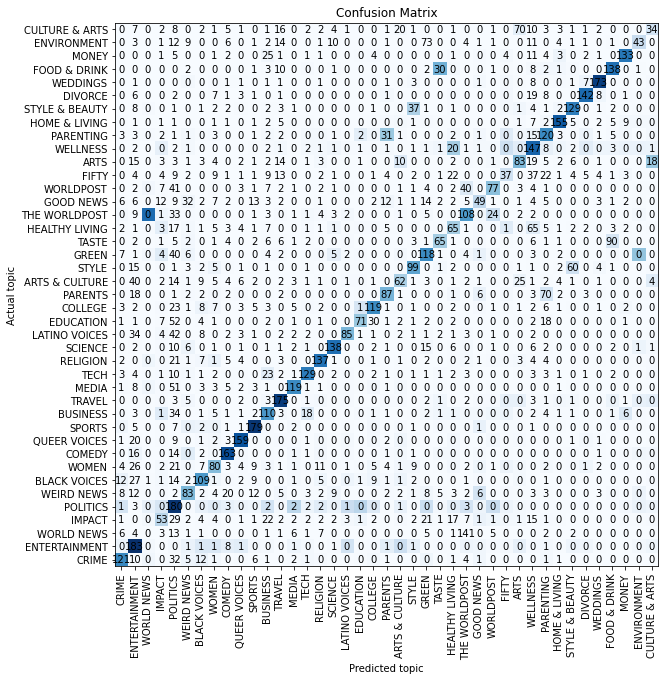

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,20))

max_val = len(cat_ids)

for i in range(max_val):
    for j in range(max_val):
        ax.text(i, j, str(confusion_matrix[i,j]), va='center', ha='center')

plt.title("Confusion Matrix")
plt.xlabel("Predicted topic")
plt.ylabel("Actual topic")
plt.xticks(np.arange(0,max_val),list(df.category.unique()),rotation = 90)
plt.yticks(np.arange(0,max_val),list(df.category.unique()))
ax.tick_params(grid_alpha = 0)


ax.set_xlim(-0.5, max_val-0.5)
ax.set_ylim(-0.5, max_val-0.5)
ax.imshow(confusion_matrix.transpose(), cmap=plt.cm.Blues, origin = 'lower', aspect = 'equal')
ax.grid()